In [1]:
import glob
import os
import pickle
import re
import pickle
import sys

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
WIN = 'D:/'
MAC = '/Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/'

osp = MAC

### Extracting the standards from the ToxID files

In [17]:
def get_std_from_toxid(original_files, stds_csvs, required_polarity):

    matches = {}
    for file_pos,o in enumerate(original_files):
        with open(stds_csvs[file_pos],'r') as s:
            for line in s:
                #to skip the comments read only the rows which start with a number
                if re.match(r"^\d+.*$",line):
                    name = line.split(',')[2].lower()
                    polarity = line.split(',')[4]
                    mz = float(line.split(',')[6])
                    if line.split(',')[9] != '':
                        rt = float(line.split(',')[9])
                    num = float(line.split(',')[0])
                    intensity = float(line.split(',')[10])
            
                    if polarity == required_polarity:
                        if not name in matches:
                            matches[name] = {}
                    
                        matches[name][o] = (num, mz, rt, intensity)
                    
    return matches



In [18]:
stds_dir = osp+'Metabolomics_datasets/Standards_csv'

original_files = glob.glob(os.path.join(stds_dir,'*.csv'))
original_files = [o.split(os.sep)[-1].split('.')[0] for o in original_files]
original_files = ['_'.join(o.split('_')[0:4]) for o in original_files]

stds_csvs = glob.glob(os.path.join(stds_dir, '*.csv'))  
matches_positive = get_std_from_toxid(original_files, stds_csvs, "+")

In [19]:
matches_positive


{'serotonin': {'Mal_Std1_1_20Dec16': (1.0, 177.10236, 4.02, 314135.0),
  'Tryps_stds1_2_24May16': (1.0, 177.10229, 4.3, 1915.0),
  'Hat_Std1_2_20150130': (2.0, 177.10223, 12.53, 15993618.0),
  'Hat_Std1_1_20150130': (2.0, 177.10222, 12.46, 18218192.0)},
 'melatonin': {'Mal_Std1_1_20Dec16': (2.0, 233.12828, 4.32, 1729600988.0),
  'Mal_Std1_2_20Dec16': (1.0, 233.12817, 4.3, 1786176528.0),
  'VL_Std1_1_06Mar18': (1.0, 233.1282, 4.25, 1271105472.0),
  'VL_Std1_2_06Mar18': (1.0, 233.12825, 4.29, 1036508880.0),
  'Zik_Std1_1_23Oct18': (1.0, 233.12831, 4.09, 2046167614.0),
  'Zik_Std1_2_23Oct18': (1.0, 233.12837, 4.05, 2130536061.0),
  'Tryps_stds1_2_24May16': (2.0, 233.12813, 4.53, 39585416.0),
  'Hat_Std1_2_20150130': (3.0, 233.12825, 5.98, 174812747.0),
  'Hat_Std1_1_20150130': (3.0, 233.12825, 5.98, 235811275.0)},
 'phenylhydrazine': {'Mal_Std1_1_20Dec16': (3.0, 109.07604, 4.86, 6144530.0),
  'Mal_Std1_2_20Dec16': (2.0, 109.07597, 4.8, 6329873.0),
  'VL_Std1_1_06Mar18': (2.0, 109.07605, 4

In [20]:
with open(osp+'pymz/mzmine/std_matches_toxid.txt', 'wb') as handle:
    pickle.dump(matches_positive, handle)

### Extracting the standards from the mzmine peak picked files

In [5]:
sys.path.append('..')
from metab_utils import get_std_matches_for_files

stds_dir = osp+'Metabolomics_datasets/Standards_csv'
output_dir = osp+'pymz/mzmine/peak_picked_files/standards'
original_files = glob.glob(os.path.join(stds_dir,'*.csv'))
original_files = [o.split(os.sep)[-1].split('.')[0] for o in original_files]
original_files = ['_'.join(o.split('_')[0:4]) for o in original_files]

original_csvs = [os.path.join(output_dir,original_file + '_pp.csv') for original_file in original_files]

matches = {}
stds_csvs = glob.glob(os.path.join(stds_dir, '*.csv'))  

matches_3ppm = get_std_matches_for_files(original_files, output_dir, stds_csvs, original_csvs)

In [6]:
matches_3ppm

{'serotonin': {'Mal_Std1_1_20Dec16': (1754,
   177.1023178100586,
   4.0217,
   3782182.2901406214),
  'Hat_Std1_2_20150130': (766, 177.1022339, 12.52536667, 259000000.0),
  'Hat_Std1_1_20150130': (874, 177.1022339, 12.4576, 306000000.0)},
 'melatonin': {'Mal_Std1_1_20Dec16': (2490,
   233.12831115722656,
   4.3155833333333335,
   33276196048.949608),
  'Mal_Std1_2_20Dec16': (2584,
   233.12832641601562,
   4.302533333333333,
   33772812929.161053),
  'VL_Std1_1_06Mar18': (3230,
   233.1283416748047,
   4.251833333333334,
   25597167515.199986),
  'VL_Std1_2_06Mar18': (2853,
   233.12835693359375,
   4.288749999999999,
   19683997207.912857),
  'Zik_Std1_1_23Oct18': (2668,
   233.12841796875,
   4.091466666666666,
   38876808977.52192),
  'Zik_Std1_2_23Oct18': (2884, 233.1283721923828, 4.0523, 40561910106.74934),
  'Tryps_stds1_2_24May16': (217,
   233.1282196044922,
   4.534083333333333,
   621267468.1495755),
  'Hat_Std1_2_20150130': (1055, 233.1282959, 5.982183333, 3110000000.0),
  

In [13]:
matches

{'serotonin': {'Mal_Std1_1_20Dec16': (1754,
   177.1023178100586,
   4.0217,
   3782182.2901406214),
  'Hat_Std1_2_20150130': (766, 177.1022339, 12.52536667, 259000000.0),
  'Hat_Std1_1_20150130': (874, 177.1022339, 12.4576, 306000000.0)},
 'melatonin': {'Mal_Std1_1_20Dec16': (2490,
   233.12831115722656,
   4.3155833333333335,
   33276196048.949608),
  'Mal_Std1_2_20Dec16': (2584,
   233.12832641601562,
   4.302533333333333,
   33772812929.161053),
  'VL_Std1_1_06Mar18': (3230,
   233.1283416748047,
   4.251833333333334,
   25597167515.199986),
  'VL_Std1_2_06Mar18': (2853,
   233.12835693359375,
   4.288749999999999,
   19683997207.912857),
  'Zik_Std1_1_23Oct18': (2668,
   233.12841796875,
   4.091466666666666,
   38876808977.52192),
  'Zik_Std1_2_23Oct18': (2884, 233.1283721923828, 4.0523, 40561910106.74934),
  'Tryps_stds1_2_24May16': (217,
   233.1282196044922,
   4.534083333333333,
   621267468.1495755),
  'Hat_Std1_2_20150130': (1055, 233.1282959, 5.982183333, 3110000000.0),
  

NameError: name 'matches' is not defined

Save the dictionary of matching metabolites.

In [14]:
with open(osp+'pymz/mzmine/std_matches.txt', 'wb') as handle:
    pickle.dump(matches, handle)

In [7]:
with open(osp+'pymz/mzmine/std_matches_3ppm.txt', 'wb') as handle:
    pickle.dump(matches_3ppm, handle)

In [6]:
with open(osp+'negative_mode/stds.dict', 'wb') as handle:
    pickle.dump(matches_negative, handle)

Or...load the dictionary of matching metabolites.

In [28]:
with open(osp+'pymz/mzmine/std_matches.txt', 'rb') as file:
    matches = pickle.load(file)

### Comparing the retention times within the datasets

In [29]:
sys.path.append("..")
from metab_utils import get_stats_on_diff
from metab_utils import get_rts_within_datasets

In [8]:
matches = matches_negative

Mean: 10.88 
SD: 58.35
Maximum difference: 426.00


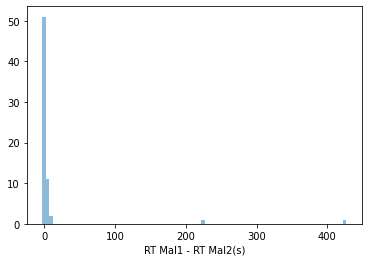

In [9]:
mal_1_rt, mal_2_rt, mal1_mal2_diff = get_rts_within_datasets('mal', matches)
get_stats_on_diff(mal_1_rt, 'Mal1', mal_2_rt, 'Mal2', mal1_mal2_diff, 5, 20)

Mean: 7.53 
SD: 36.18
Maximum difference: 244.20


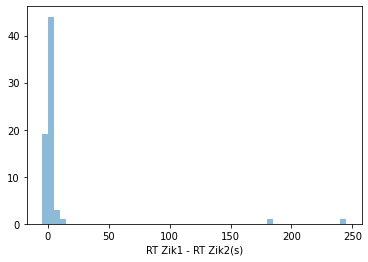

In [10]:
zik_1_rt, zik_2_rt, zik1_zik2_diff = get_rts_within_datasets('zik', matches)
get_stats_on_diff(zik_1_rt, 'Zik1', zik_2_rt, 'Zik2', zik1_zik2_diff, 5, 20)

Mean: 0.32 
SD: 4.29
Maximum difference: 21.60


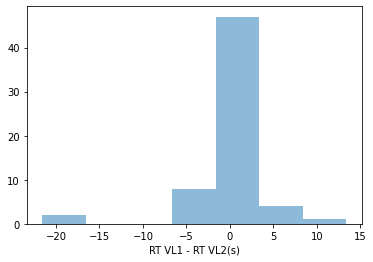

In [11]:
vl_1_rt, vl_2_rt, vl1_vl2_diff = get_rts_within_datasets('vl', matches)
get_stats_on_diff(vl_1_rt, 'VL1', vl_2_rt, 'VL2', vl1_vl2_diff, 5, 20)

Mean: -2.36 
SD: 4.55
Maximum difference: 29.99


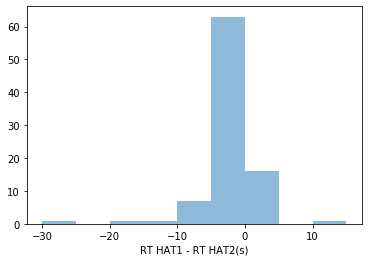

In [43]:
hat_1_rt, hat_2_rt, hat1_hat2_diff = get_rts_within_datasets('hat', matches)
get_stats_on_diff(hat_1_rt, 'HAT1', hat_2_rt, 'HAT2', hat1_hat2_diff, 5, 20)

### Comparing the retention times between the datasets

In [31]:
from metab_utils import get_rts_between_datasets

#### Zika vs Malaria 

Mean: -37.06 
SD: 58.76
Maximum difference: 429.60


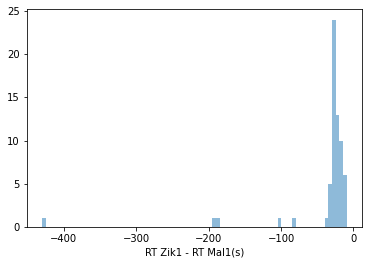

In [13]:
zik_1_rt, mal_1_rt, zik1_mal1_diff = get_rts_between_datasets('zik', 'mal', matches)
get_stats_on_diff(zik_1_rt, 'Zik1', mal_1_rt, 'Mal1', zik1_mal1_diff, 5, 20)

#### Zika vs VL

Mean: -131.18 
SD: 90.74
Maximum difference: 255.00


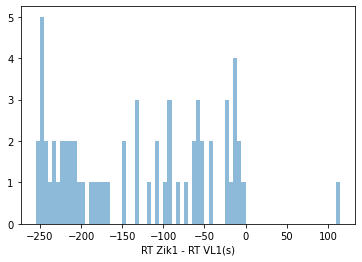

In [14]:
zik_1_rt, vl_1_rt, zik1_vl1_diff = get_rts_between_datasets('zik', 'vl', matches)
get_stats_on_diff(zik_1_rt, 'Zik1', vl_1_rt, 'VL1', zik1_vl1_diff, 5, 20)

#### Zika vs HAT

Mean: -139.12 
SD: 119.25
Maximum difference: 443.91


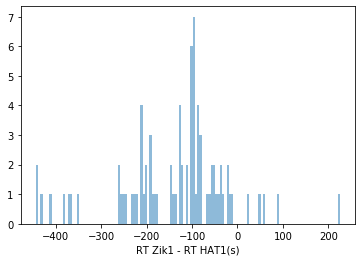

In [46]:
zik_1_rt, hat_1_rt, zik1_hat1_diff = get_rts_between_datasets('zik', 'hat', matches)
get_stats_on_diff(zik_1_rt, 'Zik1', hat_1_rt, 'HAT1', zik1_hat1_diff, 5, 20)

Mean: -156.87 
SD: 126.91
Maximum difference: 489.99


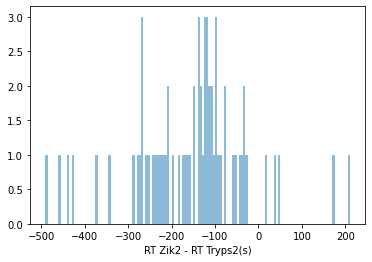

In [35]:
import numpy as np
zik_1_rt, mz, hat_1_rt, mz2 = get_rts_between_datasets('tryps', 'hat', matches, replicate=2)
get_stats_on_diff(zik_1_rt, 'Zik2', hat_1_rt, 'Tryps2', np.subtract(zik_1_rt, hat_1_rt), 5, 20)